In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from pylab import rcParams

from utils import METRICS, CONT_PARAMETERS, LOG_PARAMETERS, SET_PARAMETERS, INT_PARAMETERS, read_files,\
    top_mean_dev_auc, top_min_whole_validation_auc, top_min_dev_auc, read_files

In [2]:
rcParams['figure.figsize'] = 20, 5
pd.set_option('display.max_columns', None)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
files = ['./experiments/wide-5fold-3seed.pkl']

In [5]:
top_k = 100000

In [6]:
best_mean_dev = top_mean_dev_auc(read_files(files), top_k)
best_mean_dev.groupby(['file', 'experiment_id']).ngroups

220

In [7]:
best_min_dev = top_min_dev_auc(read_files(files), top_k)
best_min_dev.groupby(['file', 'experiment_id']).ngroups

220

In [8]:
true_best = top_min_whole_validation_auc(read_files(files), top_k)
true_best.groupby(['file', 'experiment_id']).ngroups

228

In [9]:
compare_columns = ['mean_dev_auc', 'mean_validation_auc',
               'mean_whole_validation_auc', 'max_overfit_auc',
                   'min_dev_auc', 'min_validation_auc', 'min_whole_validation_auc']

In [10]:
best_mean_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.808991  0.010866  0.793695  0.800448   
mean_validation_auc        100000.0  0.789999  0.010633  0.764389  0.782081   
mean_whole_validation_auc  100000.0  0.790733  0.010783  0.678407  0.783141   
max_overfit_auc            100000.0  0.020402  0.009683  0.009114  0.015047   
min_dev_auc                100000.0  0.795683  0.012044  0.718409  0.787068   
min_validation_auc         100000.0  0.785386  0.012223  0.697640  0.777031   
min_whole_validation_auc   100000.0  0.788361  0.014707  0.453379  0.781258   

                                50%       75%       max  
mean_dev_auc               0.806566  0.818518  0.832747  
mean_validation_auc        0.789430  0.799024  0.812787  
mean_whole_validation_auc  0.790258  0.799313  0.813447  
max_overfit_auc            0.018433  0.022297  0.109528  
min_dev_auc                0.793792  0.805666  0.823482  
min_validation_auc         0.784421  0.795550  0.809468  
min_whole_validation_auc   0.788507  0.797472  0.812311

In [11]:
best_min_dev[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.808774  0.011136  0.786920  0.800365   
mean_validation_auc        100000.0  0.789817  0.010880  0.764349  0.781854   
mean_whole_validation_auc  100000.0  0.790711  0.010859  0.678407  0.783141   
max_overfit_auc            100000.0  0.020403  0.010683  0.009114  0.014906   
min_dev_auc                100000.0  0.796108  0.011168  0.778327  0.787068   
min_validation_auc         100000.0  0.785750  0.011504  0.747370  0.777085   
min_whole_validation_auc   100000.0  0.788617  0.014121  0.453379  0.781258   

                                50%       75%       max  
mean_dev_auc               0.806557  0.818518  0.832747  
mean_validation_auc        0.789586  0.799024  0.812787  
mean_whole_validation_auc  0.790430  0.799313  0.813447  
max_overfit_auc            0.018216  0.021955  0.113688  
min_dev_auc                0.793792  0.805666  0.823482  
min_validation_auc         0.784444  0.795550  0.809468  
min_whole_validation_auc   0.788817  0.797472  0.812311

In [12]:
true_best[compare_columns].describe().T

count      mean       std       min       25%  \
mean_dev_auc               100000.0  0.790828  0.066506  0.500000  0.798558   
mean_validation_auc        100000.0  0.773593  0.062559  0.500000  0.781039   
mean_whole_validation_auc  100000.0  0.794375  0.008370  0.779528  0.787783   
max_overfit_auc            100000.0  0.019857  0.011538  0.000000  0.014520   
min_dev_auc                100000.0  0.772980  0.076449  0.435650  0.783934   
min_validation_auc         100000.0  0.764124  0.074775  0.400430  0.775816   
min_whole_validation_auc   100000.0  0.792881  0.008541  0.779364  0.785798   

                                50%       75%       max  
mean_dev_auc               0.806447  0.818516  0.832747  
mean_validation_auc        0.789679  0.799003  0.812787  
mean_whole_validation_auc  0.792895  0.801830  0.813447  
max_overfit_auc            0.018512  0.022283  0.113688  
min_dev_auc                0.793729  0.805576  0.823482  
min_validation_auc         0.784604  0.795542  0.809468  
min_whole_validation_auc   0.791528  0.800632  0.812311

In [13]:
best = best_mean_dev

In [14]:
best.shape

(100000, 61)

In [15]:
best.groupby(SET_PARAMETERS + ['file', 'experiment_id']).size().groupby(SET_PARAMETERS).size()

param_is_unbalance  param_boost_from_average
False               False                       41
                    True                        31
True                False                       85
                    True                        63
dtype: int64

In [16]:
best['param_bagging_enable'] = (best.param_bagging_freq != 0)
best.groupby('param_bagging_enable').size()

param_bagging_enable
False    68090
True     31910
dtype: int64

In [17]:
best['param_feature_fraction_enable'] = (best.param_feature_fraction != 1)
best.groupby('param_feature_fraction_enable').size()

param_feature_fraction_enable
True    100000
dtype: int64

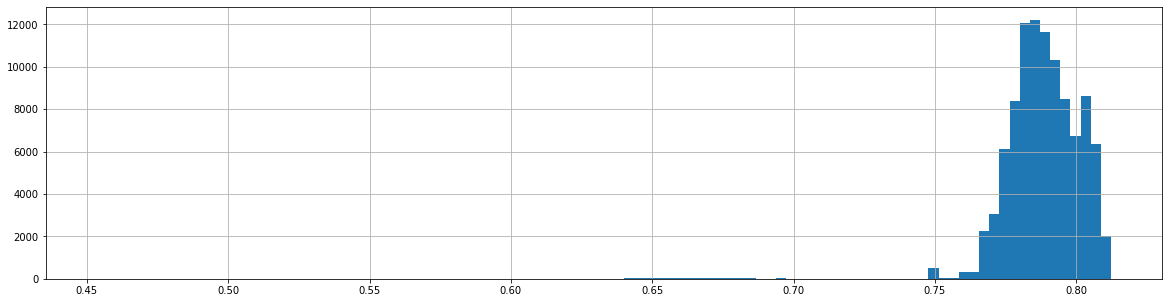

In [18]:
best.min_whole_validation_auc.hist(bins=100);

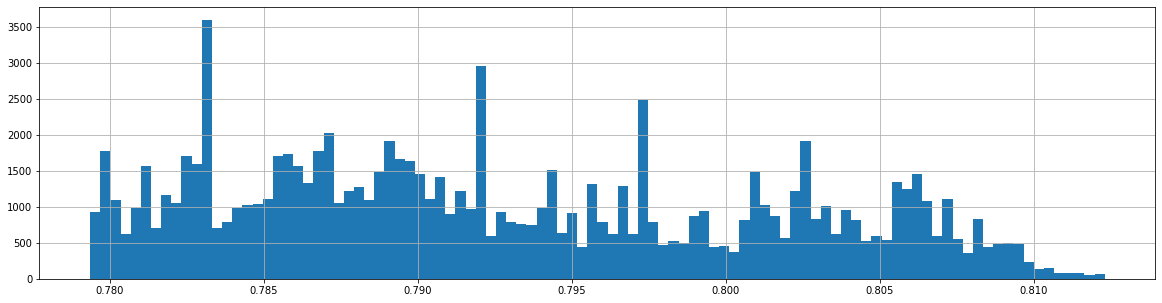

In [19]:
true_best.min_whole_validation_auc.hist(bins=100);

In [20]:
best_iteration = best.sort_values('mean_dev_auc').groupby(['file', 'experiment_id']).last()

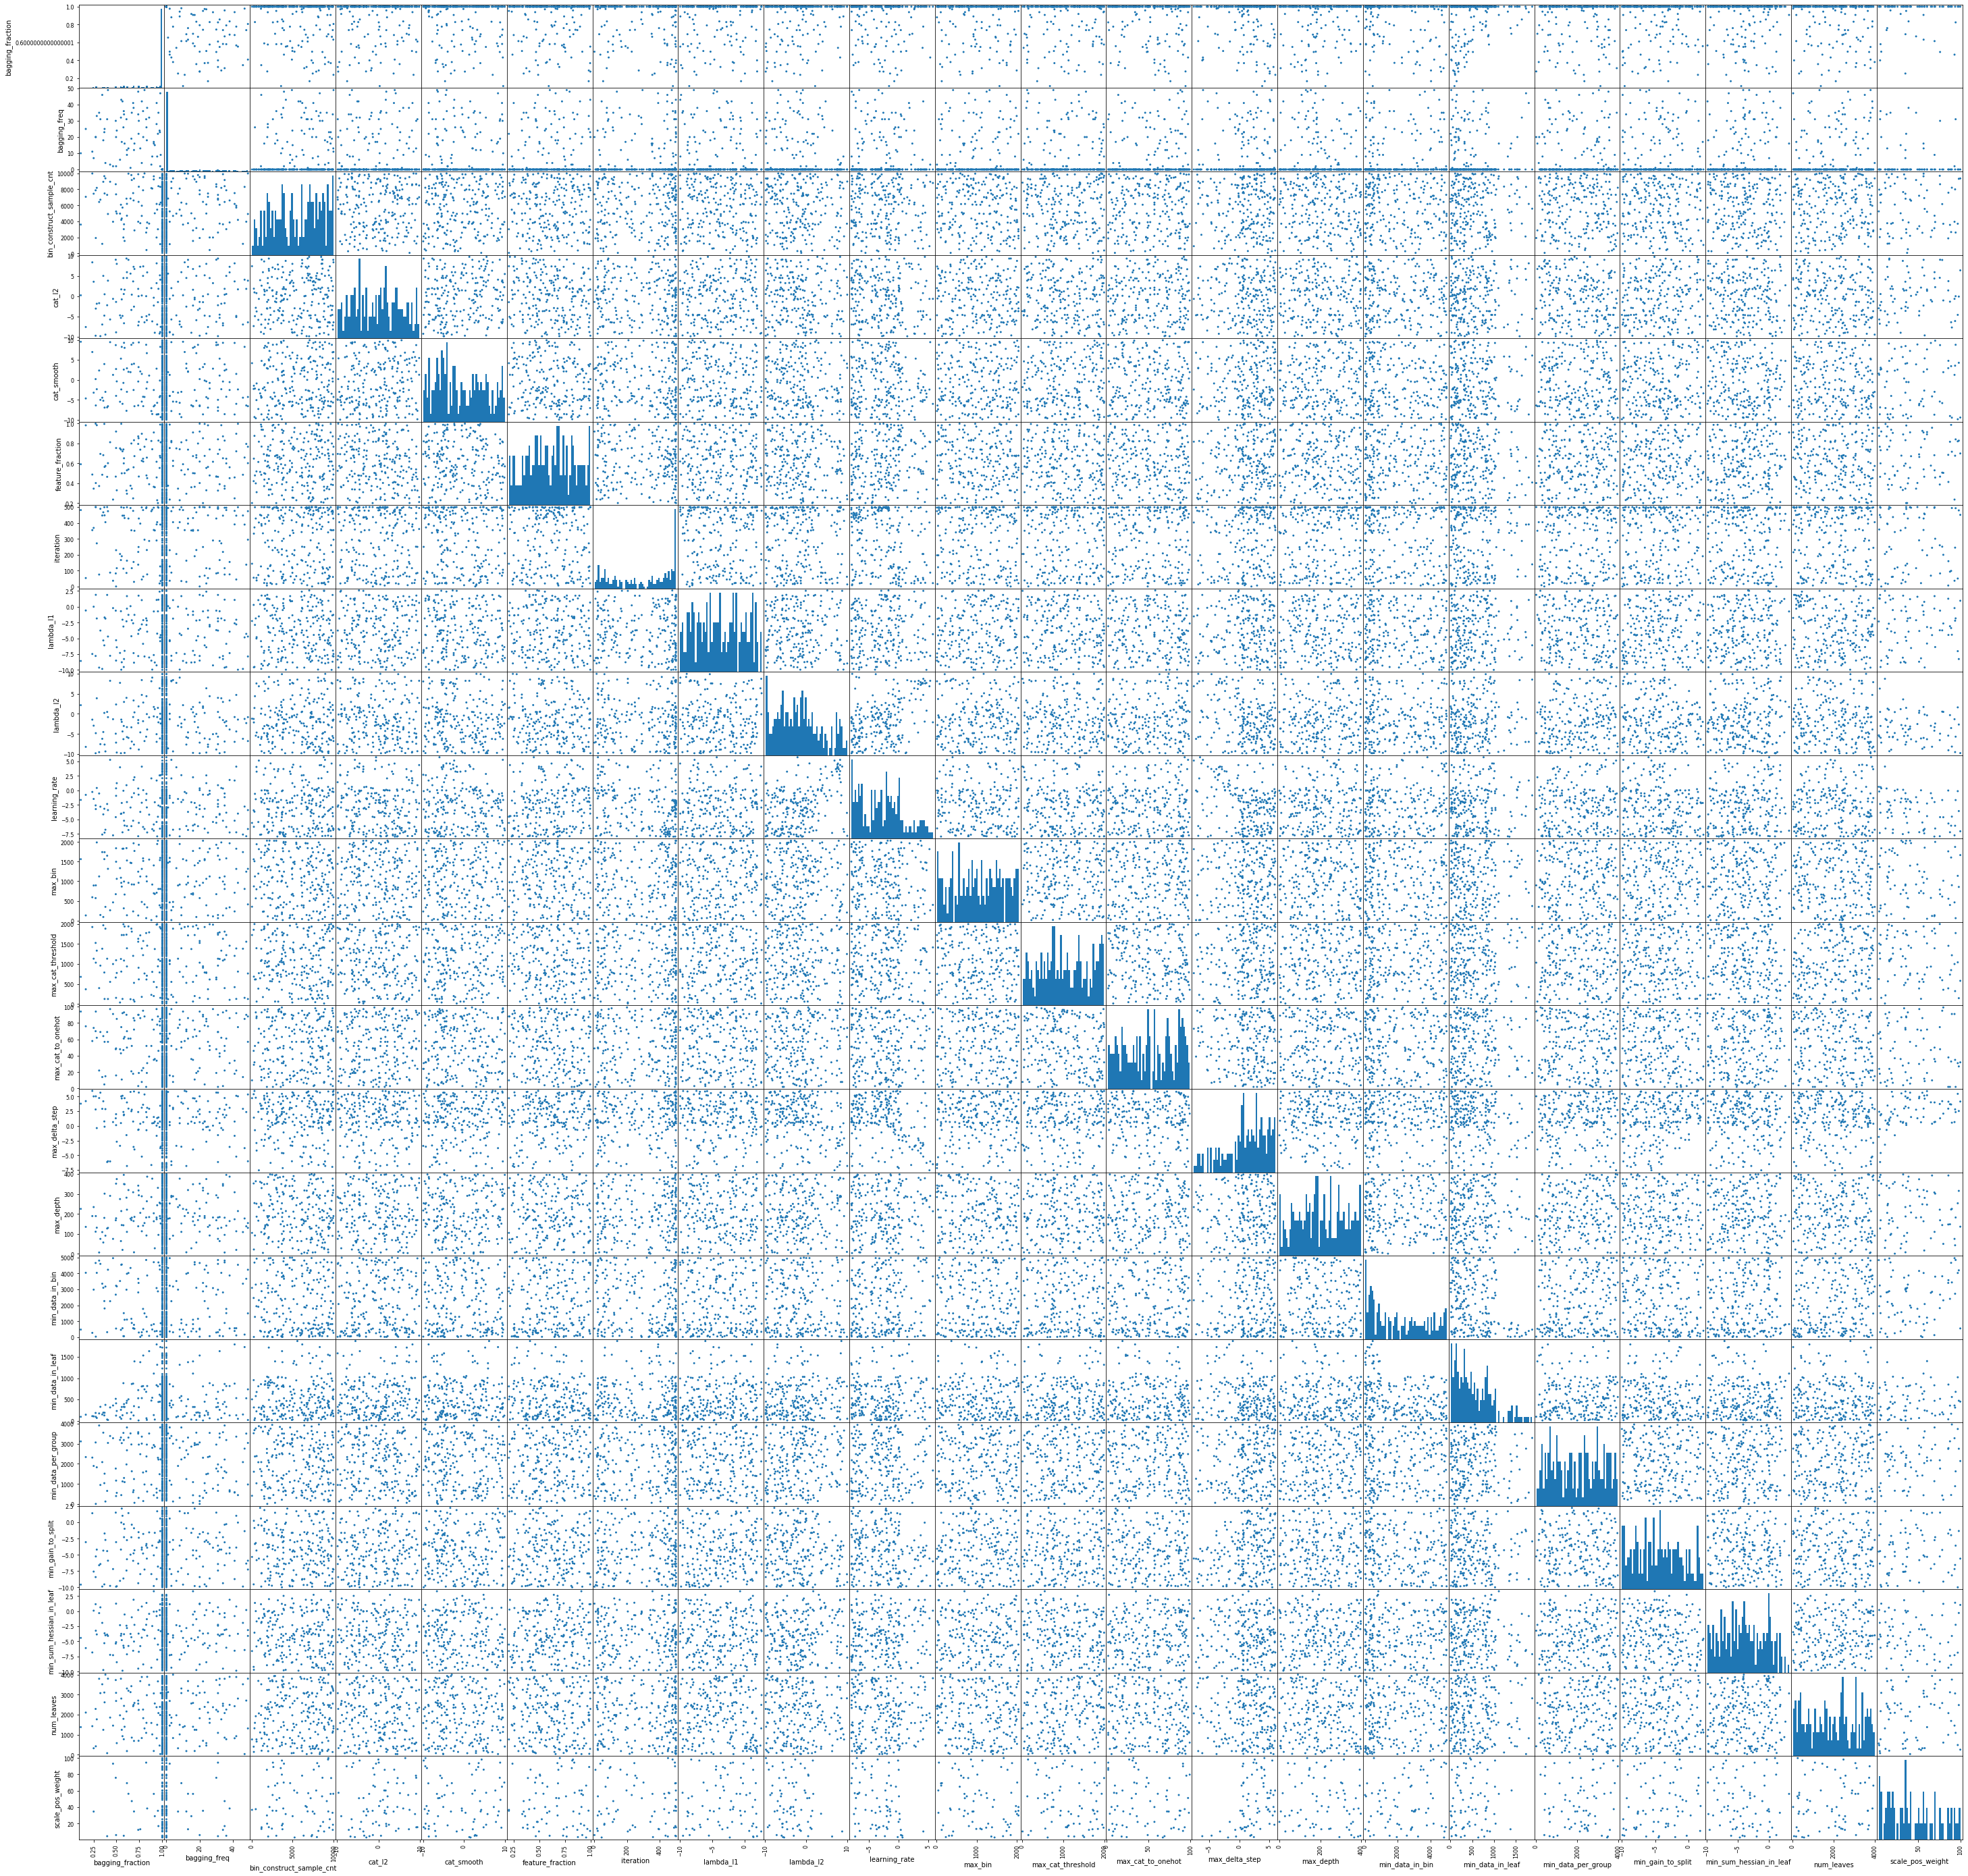

In [21]:
pd.plotting.scatter_matrix(
    pd.concat([best_iteration[CONT_PARAMETERS + INT_PARAMETERS], 
               np.log10(best_iteration[list(set(LOG_PARAMETERS))])],
              axis='columns',
              sort=True
             ).rename(lambda x: x.replace('param_', ''), axis='columns').sort_index(axis=1),
    alpha=1, figsize=(50, 50), hist_kwds={'bins': 50});

### check failures in best selected parameter range

In [22]:
best_range = best\
    [[c for c in best.columns if c.startswith('param_') and not c in SET_PARAMETERS]]\
    .drop(columns=['param_seed', 'param_bagging_enable', 'param_feature_fraction_enable'])\
    .quantile([0, 1]).T
best_range

0.0           1.0
param_bagging_fraction          1.107804e-01  1.000000e+00
param_bagging_freq              0.000000e+00  4.900000e+01
param_bin_construct_sample_cnt  5.300000e+01  9.990000e+03
param_cat_l2                    1.454478e-10  5.800938e+09
param_cat_smooth                1.045909e-10  8.183562e+09
param_feature_fraction          2.006477e-01  9.971879e-01
param_lambda_l1                 1.028902e-10  3.782759e+02
param_lambda_l2                 1.483806e-10  9.694718e+09
param_learning_rate             1.024252e-08  5.453911e+05
param_max_bin                   1.000000e+01  2.037000e+03
param_max_cat_threshold         1.400000e+01  1.997000e+03
param_max_cat_to_onehot         2.000000e+00  9.900000e+01
param_max_delta_step            2.759473e-08  9.381309e+05
param_max_depth                 1.000000e+00  3.980000e+02
param_min_data_in_bin           1.200000e+01  4.988000e+03
param_min_data_in_leaf          6.000000e+00  1.871000e+03
param_min_data_per_group        4.000000e+00  3.965000e+03
param_min_gain_to_split         1.012180e-10  1.670763e+02
param_min_sum_hessian_in_leaf   1.393860e-10  2.008466e+03
param_num_leaves                2.600000e+01  3.994000e+03
param_scale_pos_weight          2.840730e+00  9.993110e+01

In [23]:
dfs = []
for f in files:
    df = pd.read_pickle(f).assign(file=f)
    for (n, l, h) in best_range.itertuples():
        df = df[(((df[n] >= l) & (df[n] <= h))
                 | df[n].isna())].copy()
    dfs.append(df)

limited = pd.concat(dfs, ignore_index=True, sort=True)
del dfs
limited.shape

(985000, 61)

In [24]:
limited_best_iteration = limited.sort_values('min_whole_validation_auc').groupby(['file', 'experiment_id']).last()
limited_best_iteration.shape

(1970, 59)

In [25]:
limited_bad = limited_best_iteration[limited_best_iteration.min_whole_validation_auc < 0.6]

In [26]:
limited_bad.shape

(1129, 59)

TODO pikachu with bruises reaction

### top parameters

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(best_iteration.sort_values('mean_dev_auc', ascending=False).head(2).T)

file                                 ./experiments/wide-5fold-3seed.pkl  \
experiment_id                                                      3301   
cnt                                                                   3   
iteration                                                           216   
max_dev_auc                                                    0.854963   
max_dev_binary_logloss                                         0.501748   
max_overfit_auc                                                 0.02247   
max_overfit_binary_logloss                                    0.0108829   
max_validation_auc                                             0.808964   
max_validation_binary_logloss                                  0.521344   
max_whole_train_auc                                            0.843042   
max_whole_train_binary_logloss                                 0.480187   
max_whole_validation_auc                                       0.805902   
max_whole_validation_bina